# Basic Modeling

# Table of Contents
## [Notebook Introduction](#note)
## [Data Preprocessing](#data)
### [Train/Test Split](#train)
### [Vectorization](#vector)
## [Logistic Regression](#lr)
## [Support Vector Machines](#svm)
## [XGBoost](#xgb)
## [Next Steps](#next)

<a id="note"></a>
## Notebook Introduction

The purpose of this notebook is the to try to look more in-depth into different segments of the market. This will include looking at specific shoe types such as running shoes, hiking shoes, boots, clogs, etc.

<a id="data"></a>
## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import scipy.sparse as sp
from sklearn.decomposition import PCA, KernelPCA
from nltk.tokenize import word_tokenize
import numpy as np


In [2]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,1,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,5,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,5,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,3,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),5,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,1,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,5,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,5,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,5,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


In [11]:
with open('2ClassDf.pkl', 'rb') as f:
    df2 = pickle.load(f)
df2

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,1,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,1,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,1,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,1,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,1,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


Dropping any columns that aren't used for NLP instead as there will be a more in-depth analysis for NLP from this point on. 

In [12]:
# df = df.drop(columns=['helpful_votes', 'total_votes', 'verified_purchase', 'year', 'month'])
df2 = df2.drop(columns=['helpful_votes', 'total_votes', 'verified_purchase', 'year', 'month'])

In [14]:
# Sanity Check
df2

,product_title,star_rating,review_headline,review_body
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,,do not buy really didn t start to wear them u...
1,Teva Men's Pajaro Flip-Flop,1,super flip flop,provides great cushion as well as archsupport
3,adidas Men's 10K Lifestyle Runner Sneaker,1,badass,getting what u see
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,three stars,small
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,five stars,my 13 year old son loved these shoes excellent...
...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,what a waste,i purchased this shoe because it looked good ...
4358811,Women's Bree Suede Moc Snow Joggers,1,you want it you need it,this little shoe boot is so great if you re th...
4358812,Women's CanvasMule Shoes,1,cute,the backless mule is very comfortable cute ...
4358813,Birki's Super Birki Unisex Clog,1,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...


In [15]:
shoe_type1 = [r'running shoe']
RSIndex = df['product_title'].str.contains('|'.join(shoe_type1), case=False, na=False)
df_rs = df[RSIndex]
df_rs

,product_title,star_rating,review_headline,review_body
34,ASICS Men's GEL-Contend 3 Running Shoe,5,five stars,this is my second pair but different color ex...
37,New Balance Women's W850v1 Running Shoe,3,returned for a pair of asics,returned for a pair of asics cumulus they wer...
42,adidas Performance Women's Galaxy Elite W Runn...,5,five stars,very nice
45,adidas Performance Men's Thrasher 1.1 M Trail ...,5,five stars,love them i ordered a 1 2 size larger than no...
60,ASICS Women's GEL-Nimbus 16 Running Shoe,5,five stars,i love these shoes so comfortable
...,...,...,...,...
4357821,M991GL New Balance M991 Men's Running Shoe,5,best running shoes i have found,if you are an avid runner that appreciates com...
4357844,Nike ACG Air Teocalli XCR : Trail Running Shoes,2,lacks support on rough trails,i ve been running in north face gtx trail shoe...
4357929,Nike ACG Air Teocalli XCR : Trail Running Shoes,5,durable running shoe,being in dire need of some new outdoor running...
4358796,M991GL New Balance M991 Men's Running Shoe,5,990 serries,the 990 serries new balance are some of the be...


In [32]:
df_rs = df_rs.sample(50000, random_state=1)

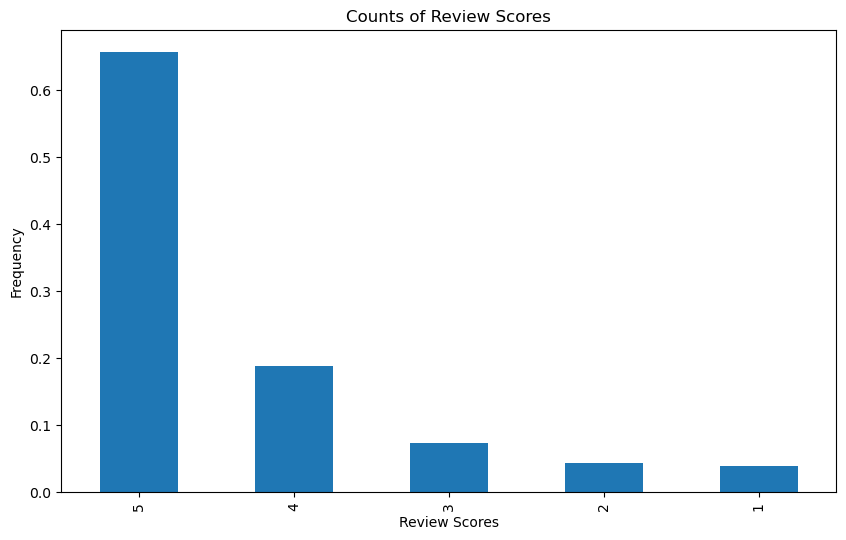

In [33]:
# Sanity check that sampling didn't affect class distribution
figure = plt.figure(figsize=(10,6))
df_rs['star_rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Counts of Review Scores')
plt.show()

After sampling, the classes distribution are still the same. Thus, the first model can be performed which is logistic regression.

<a id="train"></a>
### Train/Test Split

In [34]:
# import the library needed to split
from sklearn.model_selection import train_test_split

# assigning Reviewer_Score as target variable and everything else as X 
X_sample = df_rs.drop(columns=['star_rating'])
y_sample = df_rs['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [35]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

<a id="vector"></a>
### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used with stop words and min_df as parameters to look for. Stemming will not be used as running stemming with the full dataset is not feasible for run time (a test run with stemming on a sample set only showed a <1% increase so the trade off between run-time and readability for a small increase in accuracy is not worth it).

In [36]:
# Creating variables to be vectorized for review_body
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [37]:
# Instantiate
bag_body = CountVectorizer(stop_words="english", min_df=10) # the min_df is used to filter out random words that could pop up as well as remove some unnecessary features

# Fitting 
bag_body.fit(X_train_review_sample)

# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

In [38]:
# This count vectorizer is for X_remainder when cv is not done 
# Instantiate
bag_body2 = CountVectorizer(stop_words="english", min_df=10)

# Fit
bag_body2.fit(X_remainder_review_sample)

# Transform
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

In [39]:
# Repeat the same process for review_headline
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']

# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=10)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

In [40]:
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=10)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

Now that the 2 columns have been vectorized, the bag of words would need to be combined so it can go back into the dataframe. 

In [41]:
# combining headline and body
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [42]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [43]:
# sanity check
train_count

<28000x3895 sparse matrix of type '<class 'numpy.int64'>'
	with 512062 stored elements in Compressed Sparse Row format>

There are ~3900 words after using `CountVectorizer` on `review_headline` and `review_body`. 

In [44]:
# Grabbing the words to be used as column headers for the bag of words above
body_words = bag_body.get_feature_names_out()
# Appending b_ to words from review_body
tagged_body_words = ['b_' + feature for feature in body_words]

headline_words = bag_headline.get_feature_names_out()
# Appending h_ to words from review_headline
tagged_headline_words = ['h_' + feature for feature in headline_words]

# Combine the two to be used in the column headers
sample_vocab = tagged_headline_words + tagged_body_words

In [45]:
# Repeat the process for X_remainder
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]

headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]

sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [46]:
# Sanity check (should equal to the same number above for train_count
len(sample_vocab)

3895

In [47]:
# Combining the matrices of bag of words with the column names  
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [48]:
# Repeat for X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

Now that the review_headline and review_body have been vectorized, the string columns can be dropped and replaced.

In [49]:
# dropping string columns
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [50]:
# Repeat for X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [51]:
# combining the dataframe of bag of words back with the original dataframe
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [52]:
# Repeat for X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [53]:
# Sanity Check
combined_train

,h_10,h_100,h_1000,h_11,h_12,h_13,h_14,h_15,h_16,h_19,...,b_yrs,b_zapatos,b_zappos,b_zero,b_zig,b_zigs,b_zigtech,b_zoom,b_zoot,b_zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The last thing to do before feeding the data into the models is that the data will need to be scaled. The `StandardScalar` will be used for basic modeling and could be changed when hyperparameter optimization.

In [54]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [55]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

<a id="lr"></a>
## Logistic Regression

For the first model, logisitic regression, the C values will be manually tuned to showcase manual hyperparameter optimization. After which for other models, gridsearch will be performed for hyperparameter optimization. For the solver to be used in this LR model will be `lbfgs`, `liblinear`, and `saga`. 

In [56]:
scores = []
# the c to be iterated through
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    log = LogisticRegression(solver='lbfgs', C=c, random_state=1, max_iter=10000)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))

# Visualize the results of each model ran
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# Print the best model's C value
which_max = np.array(scores).argmax()
print("The best model has C = ",C_range[which_max])

C:\Users\mager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
# Scoring the best result
lr = LogisticRegression(solver='lbfgs', C=0.001, random_state=1, max_iter=10000)
lr.fit(X_train_scaled, y_train_sample)
lr.score(X_test_scaled, y_test_sample)

| Model                           | Accuracy |
|---------------------------------|----------|
| Logistic Regression (lbfgs)     | 79.29%   |

In [ ]:
# saving the models
with open('lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

Test accuracy with the best C value (0.001) is 79.29%. Confusion matrix and classification report should be looked at next to see other metrics.  

In [ ]:
# Get rating predictions
y_pred = lr.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test_sample)

Looking at the classification report, the class imbalance seems to affecting the predictions as f1-score for class 0 is 71% and f1-score for class 1 is 84% which is a 13% difference. This is due to recall of class 0 is 65% and 35% of actual review is being predicted as 1 whereas the recall for 1 is 89%. A big difference of 24%. This will need to be addressed if other models show the same result. 

In [ ]:
# Testing solver liblinear 
scores = []
# Reducing C_range as it seems to plateau after 1 for lbfgs
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100])

for c in C_range:
    log = LogisticRegression(solver='liblinear', C=c, random_state=1, max_iter=10000)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))

# Visualize the graph
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# Print the best model's C value
which_max = np.array(scores).argmax()
print("The best model has C = ",C_range[which_max])

In [ ]:
lr2 = LogisticRegression(solver='liblinear', C=0.0001, random_state=1)
lr2.fit(X_train_scaled, y_train_sample)
lr2.score(X_test_scaled, y_test_sample)

A solver of `liblinear` with the best C value (0.0001) had a test score of 80.08%, an increase of <1% compared to the previous solver. 

| Model                           | Accuracy |
|---------------------------------|----------|
| Logistic Regression (lbfgs)     | 79.29%   |
| Logistic Regression (liblinear) | 80.08%   |

In [ ]:
# saving the models
with open('lr2.pkl', 'wb') as f:
    pickle.dump(lr2, f)

In [ ]:
# Get rating predictions
y_pred = lr2.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(lr2, X_test_scaled, y_test_sample)

The f1-score is slightly better on this solver than lbfgs from 0.71 to 0.73 for class 0 but there is still a big difference of .11 for the f1-score. 

In [ ]:
# Testing solver saga 
scores = []
# Reducing C_range as it seems to plateau after 1 for lbfgs
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100])

for c in C_range:
    log = LogisticRegression(solver='saga', C=c, random_state=1, max_iter=10000)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))

# Visualize the graph
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# Print the best model's C value
which_max = np.array(scores).argmax()
print("The best model has C = ",C_range[which_max])

In [ ]:
lr3 = LogisticRegression(solver='saga', C=0.001, random_state=1, max_iter=10000)
lr3.fit(X_train_scaled, y_train_sample)
lr3.score(X_test_scaled, y_test_sample)

A solver of `saga` with the best C-value (0.001) had a test score accuracy of 79.34% which is ~1% decrease when compared to `liblinear`.

| Model                           | Accuracy |
|---------------------------------|----------|
| Logistic Regression (lbfgs)     | 79.29%   |
| Logistic Regression (liblinear) | 80.08%   |
| Logistic Regression (saga)      | 79.34%   |

In [ ]:
# saving the models
with open('lr3.pkl', 'wb') as f:
    pickle.dump(lr3, f)

In [ ]:
# Get rating predictions
y_pred = lr3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(lr3, X_test_scaled, y_test_sample)

In [ ]:
word_counts = pd.DataFrame({"counts":lr2.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=False)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a good review")
plt.ylabel("coeff")
plt.xticks(rotation=45)
plt.show()

From the graph above, all these words makes sense as a predictor of a good review and the main feature of a shoe that seems to be the best predictor of a good review is comfortability as it is the 7th most predictive feature of a good review. 

In [ ]:
word_counts = pd.DataFrame({"counts":lr2.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=True)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a bad review")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Again the words seems to make sense on why it could be a predictor of a bad review. For feature extraction of shoes, it seems that shoes that are too small, narrow, tight, and uncomfortable are what makes customers give bad reviews which kind of iterates that what most customer wants in a shoe is comfortability.  

In [ ]:
# To get the list of words
# for word in word_counts.index:
#     print(word)

Next, the type of scaler and penalty will be checked to see if it has an effect on accuracy. This will be used with grid search to streamline the process.

In [ ]:
%%time
from sklearn.preprocessing import MinMaxScaler
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = {
    'normalise': [StandardScaler(), MinMaxScaler(), None],
    'model': [LogisticRegression(max_iter=10000)],
    'model__solver': ['liblinear'],
    'model__penalty': ["l1", "l2"],
    'model__C': [0.0001, 0.001, 0.01] # using the best c values from the earlier modeling
}

grid_LR = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid_LR = grid_LR.fit(combined_remainder, y_remainder_sample)

In [ ]:
# saving the models
with open('gridlr.pkl', 'wb') as f:
    pickle.dump(grid_LR, f)

In [ ]:
fittedgrid_LR.best_params_

In [ ]:
# Scoring the best model
lr_grid = LogisticRegression(C=0.01, max_iter=10000, penalty='l1', solver='liblinear')
lr_grid.fit(X_remainder_scaled, y_remainder_sample) # Using remainder insted of validation as no hyperparameter optimization needed
lr_grid.score(X_test_scaled2, y_test_sample)  # X_test_scaled2 is because the model was fit with X_remainder

| Model                           | Accuracy |
|---------------------------------|----------|
| Logistic Regression (lbfgs)     | 79.29%   |
| Logistic Regression (liblinear) | 80.08%   |
| Logistic Regression (saga)      | 79.34%   |
| Logistic Regression (Gridsearch)| 80.64%   |

In [ ]:
# Get rating predictions
y_pred = lr_grid.predict(X_test_scaled2) # X_test_scaled2 is because the model was fit with X_remainder

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_grid, X_test_scaled2, y_test_sample)

Looking at the parameters, the best hyperparameter for logistic regression is 0.01, penalty of l1, solver as `liblinear` and scaling the data with `StandardScaler`. The model from this grid search performed ~0.5% better than the previous best hyperparameter model with a test score of 80.64%. Looking at the overall performance of logistic regression, the test score accuracy is around 79% with only a 1% difference between the different models and hyperparameters and a thing to note is that the 1% difference could be due to chance (as cv wasn't performed for the manual hyperparameter optimization) Next, SVM will be looked at to see if it can perform better.

<a id="svm"></a>
## SVM

SVM has a long run-time with this large dataset so hyperparameter optimization couldn't be performed. Only the default SVM and it's parameter will be explored to get a general idea if SVM can improve the accuracy of the model by a lot (>1%).

In [ ]:
%%time
SVM = svm.SVC()
SVM.fit(X_train_scaled, y_train_sample)
score = SVM.score(X_test_scaled, y_test_sample)
score

In [ ]:
# saving the models
with open('SVM.pkl', 'wb') as f:
    pickle.dump(SVM, f)

| Model                            | Accuracy |
|----------------------------------|----------|
| Logistic Regression (lbfgs)      | 79.29%   |
| Logistic Regression (liblinear)  | 80.08%   |
| Logistic Regression (saga)       | 79.34%   |
| Logistic Regression (Gridsearch) | 80.64%   |
| SVM (Default Parameters)         | 78.65%   |

SVM did not perform any better than logisitic regression in terms of test score accuracy. This might have performed better if hyperparameter optimization was performed but the run-time of an hour for just 1 model (no cv either) with default parameters is not worth the trade off as it could just lead to a small increase in accuracy (<2% increase) like logistic regression. It might have performed better for the confusion matrix and f1-score so that will be examined next.

In [ ]:
# Get rating predictions
y_pred = SVM.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(SVM, X_test_scaled, y_test_sample)

<a id="xgb"></a>
## XGBoost

In [ ]:
# Creating a pipeline and grid search for XGBoost
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200, 300],
}

grid_XGB = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_XGB = grid_XGB.fit(X_remainder_scaled, y_remainder_sample)

In [ ]:
fittedgrid_XGB.best_params_

In [ ]:
# saving the models
with open('gridXGB.pkl', 'wb') as f:
    pickle.dump(fittedgrid_XGB, f)

In [ ]:
# scoring the best model
XGB = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators = 300)
XGB.fit(X_remainder_scaled, y_remainder_sample) # Using remainder insted of validation as no hyperparameter optimization needed
XGB.score(X_test_scaled2, y_test_sample)

| Model                                | Accuracy |
|--------------------------------------|----------|
| Logistic Regression (lbfgs)          | 79.29%   |
| Logistic Regression (liblinear)      | 80.08%   |
| Logistic Regression (saga)           | 79.34%   |
| Logistic Regression (Gridsearch)     | 80.64%   |
| SVM (Default Parameters)             | 78.65%   |
| XGBoost (Gridsearch)                 | 80.10%   |

The best hyperparameter for XGBoost is when `learning_rate` is 0.1, `max_depth` is 6, and `n_estimators` is 300 with a test accuracy of 80.10%. Just slightly below the best performing model by 0.5%. The model seems to be improving still since the best hyper parameter were the highest learning_rate, max_depth, and n_estimators trained with so the model might be able to improve if those hyperparameters were set higher. Next, check the confusion matrix to see if maybe this model might be better in those metrics.

In [ ]:
# Get rating predictions
y_pred = XGB.predict(X_test_scaled2)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(XGB, X_test_scaled2, y_test_sample)

XGBoost seems to also be affected by the majority class with a 25% difference for recall between class 0 and 1. When comparing this result to the best logistic regression model, it didn't perform any better. Next, another grid search using more extreme hyperparameters will be performed to see if the model hyperparameters needs to be further increased.

In [ ]:
# Another gridsearch to further finetune
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [5, 6], # The larger the depth, the longer it takes to run
    'model__learning_rate': [1, 0.5], 
    'model__n_estimators': [500, 1000],
}

grid_XGB2 = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_XGB2 = grid_XGB2.fit(X_remainder_scaled, y_remainder_sample)

In [ ]:
# Get the best parameters and score
XGB_params2 = fittedgrid_XGB2.best_params_
XGB_params2

Since the best hyperparameters for this grid search isn't the largest values but smallest values means that the hyperparameter is close to being one of the best so further gridsearch don't need to be performed.

In [ ]:
# scoring the best model
XGB2 = XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators = 500)
XGB2.fit(X_remainder_scaled, y_remainder_sample) # Using remainder insted of validation as no hyperparameter optimization needed
XGB2.score(X_test_scaled2, y_test_sample)

| Model                                | Accuracy |
|--------------------------------------|----------|
| Logistic Regression (lbfgs)          | 79.29%   |
| Logistic Regression (liblinear)      | 80.08%   |
| Logistic Regression (saga)           | 79.34%   |
| Logistic Regression (Gridsearch)     | 80.64%   |
| SVM (Default Parameters)             | 78.65%   |
| XGBoost (Gridsearch)                 | 80.10%   |
| XGBoost (Gridsearch pt.2)            | 80.65%   |

The model has a better test score accuracy by 0.55% than the previous XGBoost grid search. It is also 0.01% better than the best logistic regression model. Therefore, this is the best performing model in terms of test score accuracy (Note: 0.01% might not be significant and could be due to chance). Next, check to see if its the best performing in precision and recall as well. 

In [ ]:
# saving the model
with open('gridXGB2.pkl', 'wb') as f:
    pickle.dump(fittedgrid_XGB2, f)

In [ ]:
# Get rating predictions
y_pred = XGB2.predict(X_test_scaled2)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)
print(classification_report(y_test_sample, y_pred))

# Visualizing confusion matrix
ConfusionMatrixDisplay.from_estimator(XGB2, X_test_scaled2, y_test_sample)

It is indeed the best model in precision and recall as well as it is greater than the previous best model by 0.01 increase in precision of class 1, and 0.02 increase in recall of class 0, where the other 2 metrics are equal between the two models. Therefore, this XGBoost is the best performing model for all measuring metrics but it is still not the best prediction system as the system overpredicts the majority class.

In [ ]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

<a id="next"></a>
## Next Steps

A major problem that kept arising while performing these models is the f1 score of class 0 being so low compared to class 1 and that is because of the imbalance dataset. To solve this problem, downsampling to make it a balanced dataset might resolve this issue and then the same modeling can be performed to see if it results in a better outcome. This will be explored in the next notebook. 